In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Sonuçları yazdır
print(df_eslesmeler.sort_values(by="skor", ascending=True))

                    orijinal            temizlenmis  eslesen_resmi  skor
114       yurt dışı (a.b.d.)       yurt ds (a.b.d.)        Bayburt    53
130     yurt dışı (k.k.t.c.)     yurt ds (k.k.t.c.)        Bayburt    53
6                   yurtdişi               yurtdisi        Bayburt    53
103     yurt dışı (i̇sviçre)      yurt ds (isvicre)          Siirt    54
62         yurtdişi (a.b.d.)      yurtdisi (a.b.d.)          Sivas    54
137       yurt dışı (i̇sveç)        yurt ds (isvec)          Sivas    54
131    yurt dışı (avusturya)    yurt ds (avusturya)            Muş    57
133   yurtdişi (i̇ngi̇ltere)   yurtdisi (ingiltere)         Bingöl    60
92    yurt dışı (i̇ngiltere)    yurt ds (ingiltere)         Bingöl    60
111   yurt dışı (azerbaycan)   yurt ds (azerbaycan)         Batman    60
124     yurtdişi (avusturya)   yurtdisi (avusturya)        Bayburt    61
128      yurtdişi (hollanda)    yurtdisi (hollanda)        Bayburt    61
123    yurtdişi (azerbaycan)  yurtdisi (azerbaycan)

In [3]:
dfp = pd.read_csv('../datas/profiles.csv')
dft = pd.read_csv('../datas/recipes_combined.csv')

In [4]:
dolu_sehir_sayisi = dfp['sehir'].notna().sum()

print("Tarif sayısı:", len(dft))
print("Profil sayısı:", len(dfp))
print(f"Şehir bilgisi dolu olan profil sayısı: {dolu_sehir_sayisi}")

print(dfp['sehir'].unique())

Tarif sayısı: 800140
Profil sayısı: 74892
Şehir bilgisi dolu olan profil sayısı: 37684
['si̇vas' 'i̇stanbul' nan 'gazi̇antep' 'ki̇li̇s' 'ankara' 'mersi̇n'
 'yurtdişi' 'kirklareli̇' 'erzurum' 'hatay' 'bursa' 'mardi̇n' 'kocaeli̇'
 'antalya' 'tokat' 'konya' 'teki̇rdağ' 'si̇i̇rt' 'samsun' 'kocaeli'
 'adana' 'yalova' 'kahramanmaraş' 'van' 'amasya' 'di̇yarbakir' 'mani̇sa'
 'i̇zmi̇r' 'şanliurfa' 'yurtdişi (fransa)' 'burdur' 'kayseri̇' 'muş'
 'trabzon' 'çanakkale' 'sakarya' 'balikesi̇r' 'adiyaman' 'eski̇şehi̇r'
 'malatya' 'ri̇ze' 'kastamonu' 'erzi̇ncan' 'kütahya' 'afyon' 'elaziğ'
 'yurtdişi (almanya)' 'ni̇ğde' 'yurt dışı (almanya)' 'batman'
 'yurt dışı (fransa)' 'çorum' 'aksaray' 'bolu' 'karaman' 'ağri' 'edi̇rne'
 'kayseri' 'karabük' 'aydin' 'isparta' 'yozgat' 'yurtdişi (a.b.d.)'
 'osmani̇ye' 'manisa' 'çankiri' 'bartin' 'muğla' 'kars' 'bi̇ngöl' 'uşak'
 'gi̇resun' 'kirikkale' 'ordu' 'gümüşhane' 'iğdir' 'bi̇leci̇k' 'bayburt'
 'deni̇zli̇' 'mersin' 'erzincan' 'i̇zmir' 'denizli' 'yurt dışı (di̇ğer)

In [6]:
import json

with open('../tr-cities-utf8.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

sehir_listesi = [feature['properties']['name'] for feature in data['features']]

print(sehir_listesi)
print("Şehir sayısı:", len(sehir_listesi))

['Adana', 'Adıyaman', 'Afyon', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'İstanbul', 'İzmir', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Şanlıurfa', 'Siirt', 'Sinop', 'Şırnak', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak']
Şehir sayısı: 81


In [7]:
import unicodedata
from fuzzywuzzy import process

mask = dfp['sehir'].fillna('').str.lower().str.contains('yurt')
df = dfp[~mask]
df = df[df['sehir'].notna()]
print("düzenlemiş şehir sayısı", len(df))

sehirler_raw = df['sehir'].dropna().unique()
print(sehirler_raw)
resmi_sehirler = ['Adana', 'Adıyaman', 'Afyon', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin',
                  'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur',
                  'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ',
                  'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Iğdır',
                  'Isparta', 'İstanbul', 'İzmir', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
                  'Kilis', 'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 'Malatya', 'Manisa',
                  'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
                  'Samsun', 'Şanlıurfa', 'Siirt', 'Sinop', 'Şırnak', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli',
                  'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak']

# Küçük harfe çevir, normalize et
def temizle(text):
    text = str(text).strip().lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# Resmi şehirleri de aynı formatta normalize et (eşleşme için)
temiz_resmi_sehirler = [temizle(x) for x in resmi_sehirler]

# Fuzzy eşleştirme fonksiyonu
def eslestir(girdi):
    temiz = temizle(girdi)
    eslesen, skor = process.extractOne(temiz, temiz_resmi_sehirler)
    if skor > 80:
        index = temiz_resmi_sehirler.index(eslesen)
        return resmi_sehirler[index]
    else:
        return None  # eşleşmeyenler

# Eşleşmiş şehir sütunu ekleyelim
df['eslesen_sehir'] = df['sehir'].apply(eslestir)
print(df[['sehir', 'eslesen_sehir']].dropna().head(10))

düzenlemiş şehir sayısı 35436
['si̇vas' 'i̇stanbul' 'gazi̇antep' 'ki̇li̇s' 'ankara' 'mersi̇n'
 'kirklareli̇' 'erzurum' 'hatay' 'bursa' 'mardi̇n' 'kocaeli̇' 'antalya'
 'tokat' 'konya' 'teki̇rdağ' 'si̇i̇rt' 'samsun' 'kocaeli' 'adana' 'yalova'
 'kahramanmaraş' 'van' 'amasya' 'di̇yarbakir' 'mani̇sa' 'i̇zmi̇r'
 'şanliurfa' 'burdur' 'kayseri̇' 'muş' 'trabzon' 'çanakkale' 'sakarya'
 'balikesi̇r' 'adiyaman' 'eski̇şehi̇r' 'malatya' 'ri̇ze' 'kastamonu'
 'erzi̇ncan' 'kütahya' 'afyon' 'elaziğ' 'ni̇ğde' 'batman' 'çorum'
 'aksaray' 'bolu' 'karaman' 'ağri' 'edi̇rne' 'kayseri' 'karabük' 'aydin'
 'isparta' 'yozgat' 'osmani̇ye' 'manisa' 'çankiri' 'bartin' 'muğla' 'kars'
 'bi̇ngöl' 'uşak' 'gi̇resun' 'kirikkale' 'ordu' 'gümüşhane' 'iğdir'
 'bi̇leci̇k' 'bayburt' 'deni̇zli̇' 'mersin' 'erzincan' 'i̇zmir' 'denizli'
 'nevşehir' 'gaziantep' 'eskişehir' 'elazığ' 'balıkesir' 'nevşehi̇r'
 'afyonkarahisar' 'tekirdağ' 'diyarbakır' 'şirnak' 'artvi̇n' 'hakkari̇'
 'kirşehi̇r' 'düzce' 'zonguldak' 'bingöl' 'bi̇tli̇s' 'iğ

In [20]:
print(df["eslesen_sehir"].value_counts().sort_index())
print(len(df["eslesen_sehir"].unique()))

eslesen_sehir
Adana            1031
Adıyaman          154
Afyon             239
Aksaray           170
Amasya            169
Ankara           3482
Antalya          1114
Ardahan            13
Artvin             59
Aydın             395
Ağrı               84
Balıkesir         464
Bartın             67
Batman            119
Bayburt            36
Bilecik            86
Bingöl             81
Bitlis             77
Bolu              100
Burdur             73
Bursa            1586
Denizli           361
Diyarbakır        420
Düzce             143
Edirne            182
Elazığ            316
Erzincan          107
Erzurum           304
Eskişehir         428
Gaziantep         854
Giresun           107
Gümüşhane          45
Hakkari            32
Hatay             614
Isparta           135
Iğdır              33
Kahramanmaraş     417
Karabük            62
Karaman            81
Kars               52
Kastamonu         102
Kayseri           869
Kilis              49
Kocaeli          1058
Konya            1

In [21]:
df.to_csv('../datas/profiles_clean.csv', index=False, encoding='utf-8-sig')

In [24]:
import pandas as pd

# 1. Profilleri oku (temizlenmiş)
profiles_cleaned = pd.read_csv('../datas/profiles_clean.csv')  # profil_adi var

# 2. Tarifleri oku
recipes_combined = pd.read_csv('../datas/recipes_combined.csv')  # profil_adi var

# 3. Profil adlarını set olarak al
valid_profiles = set(profiles_cleaned['profil_adi'].unique())

# 4. Tariflerde sadece valid profillere ait olanları filtrele
filtered_recipes = recipes_combined[recipes_combined['profil_adi'].isin(valid_profiles)]

print(f"Toplam tarif sayısı (valid profillere göre): {len(filtered_recipes)}")

Toplam tarif sayısı (valid profillere göre): 321312


In [26]:
import pandas as pd

profiles_cleaned = pd.read_csv('../datas/profiles_clean.csv')  # içinde profil_adi ve diğer kullanıcı bilgileri var

recipes_combined = pd.read_csv('../datas/recipes_combined.csv')  # içinde profil_adi ve tarif bilgileri var

merged_df = pd.merge(
    recipes_combined,
    profiles_cleaned,
    on='profil_adi',  # profil_adi sütununa göre eşleştir
    how='inner'       # sadece her iki tabloda da olan profil_adi’ler kalır
)

print(f"Birleşik DataFrame satır sayısı (tarif sayısı): {len(merged_df)}")
print("Birleşik DataFrame sütunları:", merged_df.columns)

merged_df.to_csv('../datas/recipes_with_profiles.csv', index=False, encoding='utf-8-sig')


Birleşik DataFrame satır sayısı (tarif sayısı): 321312
Birleşik DataFrame sütunları: Index(['kategori_id', 'tarif_adi', 'tarif_url', 'profil_adi', 'kayit_ay',
       'tarif_sayisi', 'takipci', 'takip', 'sehir', 'eslesen_sehir'],
      dtype='object')


📊 Tablo başarıyla kaydedildi: sehir_kullanicilar_tarifler_tablosu.png


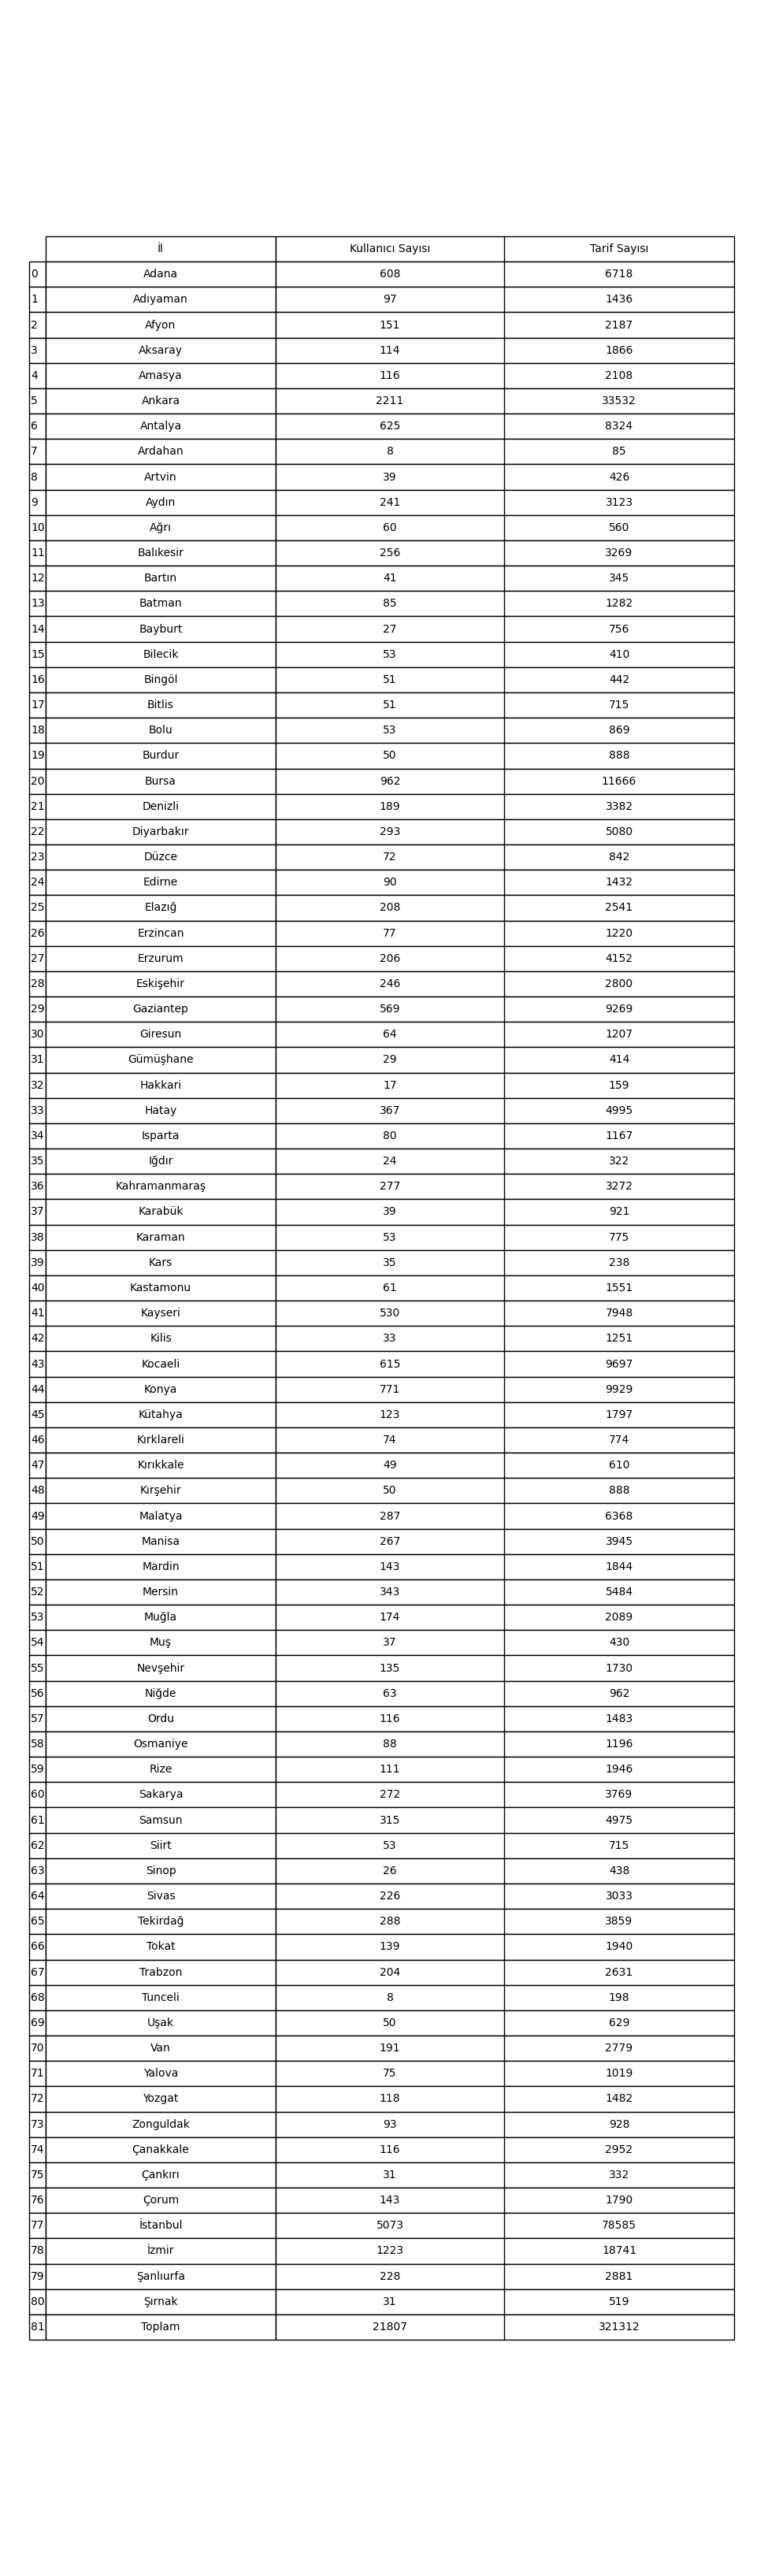

In [34]:
kullanici_sayisi = merged_df.groupby('eslesen_sehir')['profil_adi'].nunique().reset_index(name='kullanici_sayisi')# Tarif sayısı da aynı
tarif_sayisi = merged_df.groupby('eslesen_sehir').size().reset_index(name='tarif_sayisi')

sehir_counts = pd.merge(kullanici_sayisi, tarif_sayisi, on='eslesen_sehir', how='outer').fillna(0)

total_row = pd.DataFrame({
    'eslesen_sehir': ['Toplam'],
    'kullanici_sayisi': [sehir_counts['kullanici_sayisi'].sum()],
    'tarif_sayisi': [sehir_counts['tarif_sayisi'].sum()]
})
sehir_counts_with_total = pd.concat([sehir_counts, total_row], ignore_index=True)

# 5. Tabloyu png olarak kaydet
fig, ax = plt.subplots(figsize=(10, len(sehir_counts_with_total) * 0.4))
ax.axis('off')

# Sütun isimlerini istediğin şekilde değiştirebilirsin
sehir_counts_with_total = sehir_counts_with_total.rename(columns={'eslesen_sehir': 'İl', 'kullanici_sayisi': 'Kullanıcı Sayısı', 'tarif_sayisi': 'Tarif Sayısı'})

tbl = table(ax, sehir_counts_with_total, loc='center', cellLoc='center', colWidths=[0.3]*3)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

plt.tight_layout()
plt.savefig('../sehir_kullanicilar_tarifler_tablosu.png', dpi=300)
print("📊 Tablo başarıyla kaydedildi: sehir_kullanicilar_tarifler_tablosu.png")